# Level 02 Table Booking and Online Delivery

In [3]:
# importing required Libaries
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
data_df = pd.read_csv(r"E:\Project_2024\Internship_Oppurtunity_tasks\Cognifyz_Technologies\Restuarant_Dataset.csv", encoding="utf-8")

In [9]:
data_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [11]:
data_df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


## Removing symbols like "?" from the dataset

### Data Cleaning

In [17]:
data_df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [21]:
print(f"Number of Rows: {data_df.shape[0]}")

Number of Rows: 9551


In [23]:
print(f"Number of Cols: {data_df.shape[1]}")

Number of Cols: 21


In [29]:
print(data_df.dtypes)

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


### Finding rows and columns with special symbols 

In [36]:
corrupt_rows = data_df[data_df.apply(lambda x: x.astype(str).str.contains("�").any(), axis=1)]
print(corrupt_rows)

      Restaurant ID           Restaurant Name  Country Code       City  \
22          6600681               Chez Michou            30  Bras�_lia   
23          6601005       Caf�� Daniel Briand            30  Bras�_lia   
24          6600292  Casa do Biscoito Mineiro            30  Bras�_lia   
25          6600441                     Maori            30  Bras�_lia   
26          6600970            Pizza �� Bessa            30  Bras�_lia   
...             ...                       ...           ...        ...   
9546        5915730               Naml۱ Gurme           208  ��stanbul   
9547        5908749              Ceviz A��ac۱           208  ��stanbul   
9548        5915807                     Huqqa           208  ��stanbul   
9549        5916112               A���k Kahve           208  ��stanbul   
9550        5927402  Walter's Coffee Roastery           208  ��stanbul   

                                                Address     Locality  \
22    SCLN, 208, Bloco A, Loja 30, Asa 

### Here there 246 rows out of 9551 rows (entire dataset) which have special symbols which if we replace with blank then the value of column will change.
### For example ��stanbul will be stanbul. Similarly other values as well will not make any sense. 

### These rows are appx 3% of the entire dataset. Hence I will be removing the rows instead of replacing the special symbol with blank.

In [39]:
data_df = data_df[~data_df.apply(lambda x: x.astype(str).str.contains("�").any(), axis=1)]

In [41]:
print(f"Number of rows: {data_df.shape[0]}")

Number of rows: 9305


In [43]:
data_df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9512,5800710,The Manhattan Fish Market,191,Colombo,"31, Deal Place, Off R.A. De Mel Mawatha, Kollu...","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.853364,6.906814,"Seafood, Italian",...,Sri Lankan Rupee(LKR),No,No,No,No,4,4.0,Green,Very Good,196
9513,5800433,The Sizzle,191,Colombo,"32, Walukarama Road, Kollupitiya, Colombo 03","Kollupitiya, Colombo 03","Kollupitiya, Colombo 03, Colombo",79.852928,6.904581,"American, Fast Food, Steak, Beverages",...,Sri Lankan Rupee(LKR),No,No,No,No,3,4.2,Green,Very Good,286
9514,5800176,Ministry of Crab,191,Colombo,"Old Colombo Dutch Hospital, Fort, Colombo 01","Old Dutch Hospital, Fort","Old Dutch Hospital, Fort, Colombo",79.844239,6.932814,Seafood,...,Sri Lankan Rupee(LKR),No,No,No,No,4,4.9,Dark Green,Excellent,203
9515,5801321,Cafe Beverly,191,Colombo,"475/C, Sri Jayawardenapura Mawatha, Welikada, ...","Rajagiriya, Colombo","Rajagiriya, Colombo, Colombo",79.902941,6.906815,"Continental, American",...,Sri Lankan Rupee(LKR),No,No,No,No,3,4.1,Green,Very Good,58
9516,5800612,Burger's King,191,Colombo,"1, Vellons Passage, Slave Island, Colombo 02","Slave Island, Colombo 02","Slave Island, Colombo 02, Colombo",79.850748,6.923933,Fast Food,...,Sri Lankan Rupee(LKR),No,No,No,No,2,4.1,Green,Very Good,199


### Task 01 - Determine the percentage of restaurants that offer table booking and online delivery

In [70]:
# for this first we will calculate total number of restuarants
Total_restaurants = len(data_df)
Total_restaurants

9305

In [72]:
# Now we will calculate the percentage of total restuarants that offer table bookking 
Total_Table_Booking_Per = (data_df['Has Table booking']=='Yes').sum()/Total_restaurants * 100

In [74]:
Total_Table_Booking_Per

12.122514777001612

In [76]:
# Now we will calculate the percentage of total restuarants that offer online delivery
Total_online_del_Perc = (data_df['Has Online delivery']=='Yes').sum()/Total_restaurants * 100
Total_online_del_Perc

25.953788285867812

In [78]:
print(f"Percentage of restaurants offering Table Booking: {Total_Table_Booking_Per:.2f}%")
print(f"Percentage of restaurants offering Online Delivery: {Total_online_del_Perc:.2f}%")

Percentage of restaurants offering Table Booking: 12.12%
Percentage of restaurants offering Online Delivery: 25.95%


### Task 02 - Compare the average ratings of restaurants with table booking and those without.

In [84]:
Avg_rating_with_tableb = data_df[data_df['Has Table booking']=='Yes']['Aggregate rating'].mean()
Avg_rating_without_tableb = data_df[data_df['Has Table booking']=='No']['Aggregate rating'].mean()

In [86]:
#results
print(f" Avg rating with table booking: {Avg_rating_with_tableb:.2f}")
print(f" Avg rating without table booking: {Avg_rating_without_tableb:.2f}")

 Avg rating with table booking: 3.43
 Avg rating without table booking: 2.53


### Task 03 -  Analyze the availability of online delivery among restaurants with different price ranges

In [92]:
price_ranges = data_df['Average Cost for two'].apply(lambda x: 'Low' if x < 500 else 'Medium' if 500 <= x <= 1000 else 'High')
online_delivery_by_price_range = data_df.groupby(price_ranges)['Has Online delivery'].value_counts(normalize=True).unstack()

#display results
print("Online Delivery Availability by Price Range:")
print(online_delivery_by_price_range)

Online Delivery Availability by Price Range:
Has Online delivery         No       Yes
Average Cost for two                    
High                  0.718589  0.281411
Low                   0.854167  0.145833
Medium                0.568391  0.431609


## Insights from Level 01 Task 
1. Percentage of restaurants offering table booking = 12.12% 
2. Percentage of restaurants offering online delivery = 25.95%
3. Average Table booking: 3.44
4. Average Table without booking: 2.53
5. Online delivery availablity for medium price range food is better compare to high and low price food product. 

# Level 02 - Task  Price Range Analysis

### Task 01 - Determine the most common price range among all the restaurants.

In [104]:
# Most comman price range
common_price_range = data_df['Price range'].mode()[0]

print(f"Most common price range: {common_price_range}")

Most common price range: 1


### Task 02 -  Calculate the average rating for each price range.

In [109]:
avg_rating_by_price_range = data_df.groupby('Price range')['Aggregate rating'].mean()

print("Average rating for each price range:")
print(round(avg_rating_by_price_range,3))

Average rating for each price range:
Price range
1    1.998
2    2.923
3    3.660
4    3.777
Name: Aggregate rating, dtype: float64


### Task 03 - Identify the color that represents the highest average rating among different price ranges.

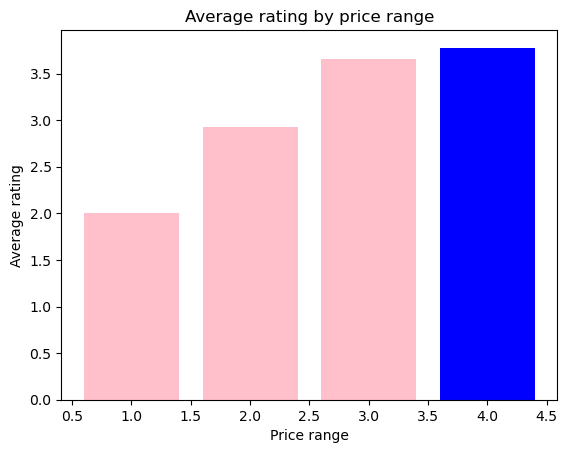

In [133]:
high_avg_color_rating = avg_rating_by_price_range.idxmax()

# create the bar plot
plt.bar(avg_rating_by_price_range.index, avg_rating_by_price_range, color='pink')

plt.bar(high_avg_color_rating, avg_rating_by_price_range[high_avg_color_rating], color='blue')

plt.xlabel('Price range')
plt.ylabel('Average rating')
plt.title('Average rating by price range')

plt.show()

### Insights from Level 02 Task 02
1. The common price range is 1
2. Price range 4 get the highest avg rating that is 3.8

# Level 02 - Task: Feature Engineering

### Task 01 - Extract additional features from the existing columns, such as the length of the restaurant name or address.

In [143]:
#length of restaurant name 
data_df['Restaurant Name Len'] = data_df['Restaurant Name'].apply(len)

#lenght of restaurant address
data_df['Restaurant Add Len'] = data_df['Address'].apply(len)



In [145]:
data_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Len,Restaurant Add Len
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,16,71
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,16,67
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,22,56
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,4,70
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,11,64


### Task 02 -  Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [150]:
data_df['Has Table Booking'] = np.where(data_df['Has Table booking'] == 'Yes', 1 ,0)
data_df['Has online delivery'] = np.where(data_df['Has Online delivery'] == 'Yes', 1, 0)

In [152]:
data_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Restaurant Name Len,Restaurant Add Len,Has Table Booking,Has online delivery
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,3,4.8,Dark Green,Excellent,314,16,71,1,0
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,3,4.5,Dark Green,Excellent,591,16,67,1,0
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,4,4.4,Green,Very Good,270,22,56,1,0
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,4,4.9,Dark Green,Excellent,365,4,70,0,0
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,4,4.8,Dark Green,Excellent,229,11,64,1,0


# Insights from the level 02 task 03
In total 4 new columns added 'Restaurant Name Len', 'Restaurant Address Len',' Has table booking', 'Has online delivery'